# The Known tracrRNA Universe
#### From perviosuly published tracrRNAs, what are the corresponding BLAST and structural genomes in our cas9 Universe?

<h5 style="color:blue">Libraries and workspace setup</h5>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os, sys
sys.path.append("scripts/")
from Bio.Blast import NCBIXML
from Bio.SeqIO import index as fasta_index
from Bio.SeqIO import parse, write
from collections import Counter
from easyFunctions import *
from HMMParser import *
from InfernalResults import ProcessInfernal, TRACR_RNA
from pandas import Series
from random import randint

r = lambda: randint(0,255)            
def color():return '#%02X%02X%02X' % (r(),r(),r())
def findBiggestCluster(seqID, clusters, clusterMap): return Counter(dict((k, clusterMap[k]) for k in (clusters))).most_common(1)[0][0] 
os.chdir("/mnt/research/germs/shane/transActRNA/data")
gene = "Cas9"
# if os.path.exists("pickles/Step2.db"): 
#     dill.load_session('pickles/Step2.db')
#     print "Loaded Session"

<h5>Data</h5>

In [2]:
#Raw
knownTracrFile = "sequences/PioneerCrisprs.fasta"
casRepAssembliesFile = "assemblies/%s_Representative_Assemblies.fasta" % (gene)
allCasRepsFile = "assemblies/All_%s_Representative_Assemblies.fasta" % (gene)
knownTracrRNAs = fasta_index(knownTracrFile,"fasta")
casRepProteins = fasta_index("proteins/%s-Like-clustered.faa" % (gene),"fasta")

#minimum lengths of blast hits
tracrLengths = {}
for id,rec in knownTracrRNAs.items(): tracrLengths[id] = len(rec.seq)*0.6  

In [4]:
def processBLAST(blastFileName,tracrLengths):
    blastResults = NCBIXML.parse(open(blastFileName,'r'))
    tracrBLAST = {}
    numRepr=set()
    numFilteredByLength,hitCount = 0,0
    for result in blastResults:
        for hit in result.alignments:
            for hsp in hit.hsps: 
                coord = Coordinate(min(hsp.sbjct_start,hsp.sbjct_end),max(hsp.sbjct_start,hsp.sbjct_end))
                hitLen = len(coord)
                if hitLen < tracrLengths[result.query]:
                    numFilteredByLength += 1
                    continue # Skip hits that may be sequencing artifacts or partial crRNA hits
                try:
                    numRepr.add(result.query)
                    hitCount += 1
                    tracrBLAST[hit.hit_def].append([result.query,coord])
                except: tracrBLAST[hit.hit_def]=[[result.query,coord]]
    return tracrBLAST, numRepr

<h4>BLAST the known tracrRNAs against the genomes of cas9 associated assemblies</h4>

In [9]:
allKnownTracrBlastOut = "blastout/PioneerTracrRNAsAll.blastout"
repsKnownTracrBlastOut = "blastout/PioneerTracrRNAsReps.blastout"

#blastResults = BLAST_short(knownTracrFile,allCasRepsFile,repsKnownTracrBlastOut)
# blastResults = BLAST_short(knownTracrFile,casRepAssembliesFile,repsKnownTracrBlastOut)
tracrBLASTReps, numRepr = processBLAST(repsKnownTracrBlastOut, tracrLengths)
tracrBLAST, numAll = processBLAST(allKnownTracrBlastOut, tracrLengths)
# blastResults = NCBIXML.parse(open(knownTracrBlastOut,'r'))
# tracrBLAST, tracrCVG = {},{}
# lengthDist = []
# numRepr=set()
# numFilteredByLength,hitCount = 0,0
# for result in blastResults:
#     for hit in result.alignments:
#         for hsp in hit.hsps: 
#             coord = Coordinate(min(hsp.sbjct_start,hsp.sbjct_end),max(hsp.sbjct_start,hsp.sbjct_end))
#             hitLen = len(coord)
#             try: tracrCVG[result.query] = max(tracrCVG[result.query],abs(hsp.sbjct_end-hsp.sbjct_start))
#             except: tracrCVG[result.query] = hitLen
#             if hitLen < tracrLengths[result.query]:
#                 numFilteredByLength += 1
#                 continue # Skip hits that may be sequencing artifacts or partial crRNA hits
#             try:
#                 numRepr.add(result.query)
#                 lengthDist.append(hitLen)
#                 hitCount += 1
#                 tracrBLAST[hit.hit_def].append([result.query,coord])
#             except: tracrBLAST[hit.hit_def]=[[result.query,coord]]
# print("Found and recorded %i / %i hits\nHits are represented in %i / %i Cas related Assemblies" % (hitCount,hitCount+numFilteredByLength,len(tracrBLAST),len(casRepProteins)))
print("Found %i of the %i known tracrs" % (len(numRepr),len(knownTracrRNAs)))
# dump(tracrBLAST,"pickles/Pioneer_tracrBlast.p")
# dump(lengthDist,"pickles/tracrLenDist.p")

Found 46 of the 48 known tracrs


In [10]:
all = {}
for res, val in tracrBLAST.items():
    for id,coord in val:
        try: all[id].add(res.split(" ")[0])
        except: all[id] = set([res.split(" ")[0]])

In [11]:
missingKeys = set(all.keys()).difference(numRepr)
len(missingKeys)

2

In [12]:
for key in missingKeys:
    print(key,all[key])

Legionella_pneumophila {'NZ_LOLP01000005.1', 'NZ_RBFS01000066.1', 'CP017457', 'FJCG01000006', 'NZ_KK074140.1', 'QWDX01000001.1', 'CP021260.1', 'JFIG01000037', 'NZ_QFHM01000015.1', 'CP021277', 'BBUJ01000003.1', 'FJBH01000013.1', 'AVOW01000039', 'NZ_CP021281.1', 'LOLE01000008', 'NZ_CP021279.1', 'LAXQ01000016.1', 'FJCH01000005', 'NZ_FJCI01000014.1', 'FJBY01000014.1', 'NZ_QWDU01000001.1', 'UGOU01000002.1', 'LOMA01000038', 'LBAA01000002', 'NZ_LAZZ01000018.1', 'NZ_QWDS01000002.1', 'FJLT01000003.1', 'FJCF01000016.1', 'AWES01000030', 'PQWY01000001', 'CP017602', 'CP016030', 'AVNJ01000012', 'FJEA01000015.1', 'RBFP01000056.1', 'AVOV01000026.1', 'NZ_CP021286.1', 'LCUP01000045', 'LBAM01000011.1', 'NZ_CP017458.1', 'FJDY01000015', 'CP021264', 'UGOO01000001.1', 'NZ_QWDW01000001.1', 'NZ_QWDY01000001.1', 'NZ_FJAQ01000015.1', 'LAVQ01000004.1', 'FJDZ01000002', 'NZ_CAFM01000006.1', 'FJBQ01000014', 'FJDU01000015.1', 'CP015927', 'NZ_FJAG01000013.1', 'QWDT01000001.1', 'CP016030.2', 'LOLL01000057.1', 'LBMS0100

In [4]:
for i,key in enumerate(knownTracrRNAs.keys()):
    if key not in tracrCVG: 
        print(">"+key+ "_%i" % (len(knownTracrRNAs[key].seq)))
        print(str(knownTracrRNAs[key].seq)+"\n") #.reverse_complement()
#     print("%i\t%i\t%i\t%i" % ((i,tracrCVG[key],len(knownTracrRNAs[key].seq),len(knownTracrRNAs[key].seq)-tracrCVG[key])))

>Caenispirillum_salinarum_84
GGACCGGCACCTACAGGACAAGTGATCATACACGTGACAGCCGCCTCCCCCGCCCCAGTGGCCAAGGGGAGGCGGCTTTTCTTT

>Bifidobacterium_bombi_81
ATTGAATTTGAAATAAGGCTGTTCCTTCGTTAGTTCAGTCGATTGCTCCTCCGGTATTGCTTTTGCATGCCGGAGTTTTTT

>Corynebacterium_camporealensis_79
GGAACTGAACCTCAGTAATCACCGGCTCGTTTCCGGTGAAGAATGCTCCAGTCGGCGCCCACTGGGCGTCGACTTTTCT

>Legionella_pneumophila_116
TTCGATACCCTGAAATCAACAAAATTAAAGATTGAATCGTTTTTCTATGCTCGTCTTAATAGCGAGCATATAACGATTTCAAAATCTATCGTTACAGTGATTTAGAAACTCACACT



In [ ]:
set(knownTracrRNAs.keys()).difference(tracrCVG.keys())

In [5]:
missing = {"Caenispirillum_salinarum":['GCF_000315795.1','GCA_000315795.1'],
           'Bifidobacterium_bombi':['GCF_000737845.1','GCA_000737845.1'],
        
'Corynebacterium_camporealensis':{'GCA_000766885.2': 'CP027001.1','GCA_000980815.1': 'CP011311.1'},
'Legionella_pneumophila':{
    'GCA_003004315.1': 'CP021286.1', 
    'GCA_003004275.1': 'CP021281.1',
    'GCA_003003515.1': 'CP021256.1',
    'GCA_001752825.1': 'CP015931.1',
    'GCA_001752785.1': 'CP015929.1',
    'GCA_001752745.1': 'CP015927.1',
    'GCA_001677075.2': 'CP016030.2',
    'GCA_001610735.1': 'CP011105.1'}}


In [6]:
gene = 'Cas9'
assembliesWCrisprs = load(open("pickles/allAssemblyW_CRISPRs.p","rb")) 
hmm_parser = load(open("pickles/%s_HMM_Parsing_Results.p" % (gene), "rb"))
assemblyProtMap = load(open("pickles/%s_assemblyProMap.p" % (gene),'rb'))
allClusterSeqIDs = load(open("pickles/%s_RevClusteringResults.p" % (gene),'rb'))
nukSeqHash = load(open("pickles/%s_nukSeqHash.p" % gene,'rb'))

In [39]:
list(allClusterSeqIDs)[0:10]

['FNUS01000008_ORF11136',
 'NZ_KV793811.1_ORF3019',
 'QJTD01000003.1_ORF18407',
 'NIDL01000002.1_ORF135',
 'GG740084.1_ORF30',
 'NZ_HE999452.1_ORF30',
 'CAJK01000259_ORF30',
 'DF970668.1_ORF14579',
 'BBZD01000017_ORF79',
 'PFHY01000226.1_ORF106']

In [46]:
blastres = {}
for tracrName,fList in missing.items():
    blastres[tracrName]={}
    print(tracrName)
    for asm in fList:
        if type(fList) == type({}):
            #hmm_parser.results[asm].__get_proteins__("hmm/results/"+asm+".hmmout")
            for prot in hmm_parser.results[asm].proteins: 
                print("\t"+asm,asm in assembliesWCrisprs, asm in hmm_parser, prot, fList[asm],prot in allClusterSeqIDs )
                seq = str(fasta_index(assembliesWCrisprs[asm],"fasta")[fList[asm]].seq).upper()
                if seq in nukSeqHash:
                    print("\t\t",nukSeqHash[seq])
        else: print("\t"+asm,asm in assembliesWCrisprs)
        tmp = MakeFasta("%s.fasta"%(asm))
        tmp.write(asm,str(knownTracrRNAs[tracrName].seq))
        tmp.close()
        BLAST_short("%s.fasta"%(asm),assembliesWCrisprs[asm], "%s.blasout"%(asm))
        blastres[tracrName][asm] = NCBIXML.parse(open("%s.blasout"%(asm),'r'))

Caenispirillum_salinarum
	GCF_000315795.1 True
	GCA_000315795.1 True
Bifidobacterium_bombi
	GCF_000737845.1 True
	GCA_000737845.1 True
Corynebacterium_camporealensis
	GCA_000766885.2 True True CP027001.1_ORF23238 CP027001.1 False
	GCA_000980815.1 True True CP011311.1_ORF23235 CP011311.1 False
Legionella_pneumophila
	GCA_003004315.1 True True CP021286.1_ORF11884 CP021286.1 False
	GCA_003004275.1 True True CP021281.1_ORF11885 CP021281.1 False
	GCA_003003515.1 True True CP021256.1_ORF11068 CP021256.1 False
	GCA_001752825.1 True True CP015931.1_ORF11289 CP015931.1 False
	GCA_001752785.1 True True CP015929.1_ORF11289 CP015929.1 False
	GCA_001752745.1 True True CP015927.1_ORF11289 CP015927.1 False
	GCA_001677075.2 True True CP016030.2_ORF11885 CP016030.2 False
	GCA_001610735.1 True True CP011105.1_ORF11092 CP011105.1 False


In [44]:
for tracr in blastres:
    print(tracr)
    for asm in blastres[tracr]:
        print("\t",asm)
        for res in blastres[tracr][asm]:
            for hit in res.alignments:
                for hsp in hit.hsps: 
                    coord = Coordinate(min(hsp.sbjct_start,hsp.sbjct_end),max(hsp.sbjct_start,hsp.sbjct_end))
                    print("\t\t",res.query,hit.hit_def, coord)
#             print("\t\t",str(parseSingleBLAST(res)))

Caenispirillum_salinarum
	 GCF_000315795.1
		 GCF_000315795.1 NZ_ANHY01000014.1 Caenispirillum salinarum AK4 contig14, whole genome shotgun sequence [48346	48429]+
	 GCA_000315795.1
		 GCA_000315795.1 ANHY01000014.1 Caenispirillum salinarum AK4 contig14, whole genome shotgun sequence [48346	48429]+
Bifidobacterium_bombi
	 GCF_000737845.1
		 GCF_000737845.1 NZ_ATLK01000001.1 Bifidobacterium bombi DSM 19703 DSM19703_C1, whole genome shotgun sequence [737030	737110]+
	 GCA_000737845.1
		 GCA_000737845.1 ATLK01000001.1 Bifidobacterium bombi DSM 19703 DSM19703_C1, whole genome shotgun sequence [737030	737110]+
Corynebacterium_camporealensis
	 GCA_000766885.2
		 GCA_000766885.2 CP027001.1 Corynebacterium camporealensis strain CIP 105508 chromosome, complete genome [597198	597276]+
	 GCA_000980815.1
		 GCA_000980815.1 CP011311.1 Corynebacterium camporealensis strain DSM 44610, complete genome [597241	597319]+
Legionella_pneumophila
	 GCA_003004315.1
		 GCA_003004315.1 CP021286.1 Legionella pn

In [38]:
print(dir(res))
print()
print(res.query)
print(hsp)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'alignments', 'application', 'blast_cutoff', 'database', 'database_length', 'database_letters', 'database_name', 'database_sequences', 'date', 'descriptions', 'dropoff_1st_pass', 'effective_database_length', 'effective_hsp_length', 'effective_query_length', 'effective_search_space', 'effective_search_space_used', 'expect', 'filter', 'frameshift', 'gap_penalties', 'gap_trigger', 'gap_x_dropoff', 'gap_x_dropoff_final', 'gapped', 'hsps_gapped', 'hsps_no_gap', 'hsps_prelim_gapped', 'hsps_prelim_gapped_attemped', 'ka_params', 'ka_params_gap', 'matrix', 'multiple_alignment', 'num_good_extends', 'num_hits', 'num_letters_in_database', 'num_seqs_better_e',

# Build the tree with Cas Related Assemblies with a BLAST Hit

In [25]:
clusterMap = {} #Hits clustered by where the most common tracrRNA sequence
tracrBLASTMap = {}
for seqID,clusterList in tracrBLAST.items():
    tracrBLASTMap[seqID]=set()
    for clusterID in clusterList:
        try: clusterMap[clusterID[0]].add(seqID)
        except: clusterMap[clusterID[0]] = set([seqID])
        tracrBLASTMap[seqID].add(clusterID[0])  

blastTreeColors,colorMap = {},{}
for seqID,clusters in tracrBLASTMap.items():
    biggestCluster = findBiggestCluster(seqID, clusters, clusterMap)
    try: blastTreeColors[seqID] = colorMap[biggestCluster]
    except: 
        colorMap[biggestCluster] = color()
        blastTreeColors[seqID] = colorMap[biggestCluster]
print ("Annotated %i CRISPR-Cas Systems" % (len(blastTreeColors)))
print ("Systems were annotated with a total of %i cluster groups" %(len(colorMap)))

dump(blastTreeColors,"pickles/Pioneer_tracrBlast.p") #PaperTracrBLAST_HitsTreeColors.p")

Annotated 615 CRISPR-Cas Systems
Systems were annotated with a total of 35 cluster groups

Dumping pickles/Pioneer_tracrBlast.p


# Some stats on the blast hits

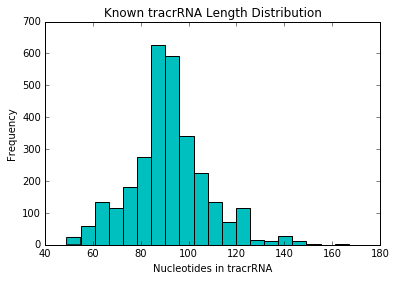

In [5]:
#tracrRNA BLAST Hit Length Distribution
dist = Series(lengthDist)
ax = dist.plot.hist(bins=20,color='c');
ax.set_title("Known tracrRNA Length Distribution");
ax.set_xlabel("Nucleotides in tracrRNA");

count    83.000000
mean      8.397590
std      14.400999
min       1.000000
25%       1.000000
50%       3.000000
75%       7.500000
max      81.000000
dtype: float64


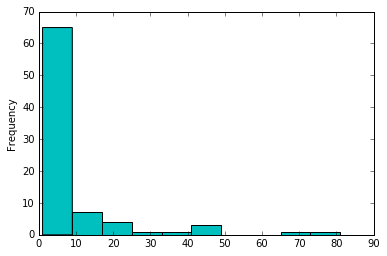

In [6]:
blastClusterColorCounter = Counter(blastTreeColors.values())
dist = Series(blastClusterColorCounter)
dist.plot.hist(color='c');
print dist.describe()

In [7]:
for i in range(1,10):
    print "Number of tracrRNAs that did not cross hit in %i systems: %i" % (i,len(dist[dist==i]))

Number of tracrRNAs that did not cross hit in 1 systems: 25
Number of tracrRNAs that did not cross hit in 2 systems: 14
Number of tracrRNAs that did not cross hit in 3 systems: 7
Number of tracrRNAs that did not cross hit in 4 systems: 6
Number of tracrRNAs that did not cross hit in 5 systems: 4
Number of tracrRNAs that did not cross hit in 6 systems: 1
Number of tracrRNAs that did not cross hit in 7 systems: 5
Number of tracrRNAs that did not cross hit in 8 systems: 3
Number of tracrRNAs that did not cross hit in 9 systems: 1


# BLAST results are known, now prepare for structural search

<h4>Create a file for all of the tracrRNA hits.</h>

In [8]:
# Add hits to a fasta file
tracrSeqs = {}
fh = open("sequences/PaperTracrBLAST_Hits.fa","w")
index = 0
for id in tracrBLAST:
    for queryID, coord in tracrBLAST[id]:
        seq = casRelatedAssemblies[id][min(coord.start,coord.end):max(coord.start,coord.end)]
        seq.id += "_%i" % index
        index+=1
        write(seq,fh,"fasta")
fh.close()

<h4>Cluster all BLAST hits to form consensus sequences</h4>

In [19]:
%%bash
#Cluster the tracrRNA sequence hits
cd-hit-est -i sequences/PaperTracrBLAST_Hits.fa -o clusters/PaperTracrBLAST_Hits.fa -M 0 -d 0 -n 7 -c .9 -T 0 -sc 1

Program: CD-HIT, V4.7 (+OpenMP), Jul 11 2017, 18:04:58
Command: cd-hit-est -i sequences/PaperTracrBLAST_Hits.fa -o
         clusters/PaperTracrBLAST_Hits.fa -M 0 -d 0 -n 7 -c .9
         -T 0 -sc 1

Started: Fri Jan 11 15:50:40 2019
                            Output                              
----------------------------------------------------------------
total number of CPUs in the system is 28
Actual number of CPUs to be used: 28

total seq: 2966
longest and shortest : 167 and 49
Total letters: 272089
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 28 X 12M = 339M
Table           : 2 X 0M = 0M
Miscellaneous   : 0M
Total           : 340M

Table limit with the given memory limit:
Max number of representatives: 449393
Max number of word counting entries: 10850988

# comparing sequences from          0  to         98
---------- new table with       37 representatives
# comparing sequences from         98  to        193
....

<h4>Take consensus clusters to divide blast results by closest probable structure</h4>

	Total number of clusters: 171
	Number of nodes covered: 2866
2866


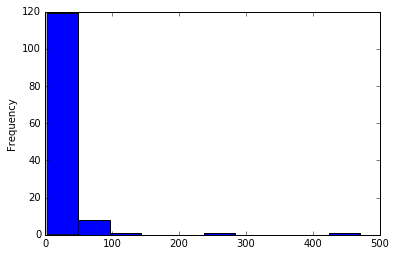

In [20]:
allClusters = processClusterFile("clusters/PaperTracrBLAST_Hits.fa.clstr")
TreeColors, clusterDist = generateTreeColors(allClusters,cutoff=2)
clusterDist = Series(clusterDist)
clusterDist[clusterDist>2].plot.hist();

<h4>Build Consensus Structure Fasta files</h4>

In [23]:
tracrSeqDict = fasta_index("sequences/PaperTracrBLAST_Hits.fa","fasta")

for cluster, seqIDList in allClusters.iteritems():
    clusterFileName = "conseqs0/"+cluster.replace(" ","_")+".fasta"
    fh = open(clusterFileName,"wb")
    clusterStats = []
    for seqID in seqIDList: clusterStats.append(len(tracrSeqDict[seqID]))
    clusterStats = Series(clusterStats)
    keepSeqs = clusterStats[~((clusterStats-clusterStats.mean()).abs() > clusterStats.std())]
    minSeq, maxSeq = keepSeqs.min(), keepSeqs.max()
    index=0
    for seqID in seqIDList: 
        seqLen = len(tracrSeqDict[seqID])
        if seqLen >= minSeq and seqLen <= maxSeq:
            index+=1
            fh.write(">%s\n%s\n" % (seqID,str(tracrSeqDict[seqID].seq)))
    fh.close()
    if index <= 1:
        os.system("rm %s" % (clusterFileName))
        continue
    print clusterFileName,"(",index,"/",len(seqIDList), ")[%i,%i]" % (minSeq,maxSeq),clusterStats.std() 
    os.system("cd-hit-est -i %s -o %s_cluster -M 0 -d 0 -c .90 -T 0 -sc 1" % (clusterFileName,clusterFileName))
    clusteredResults = processClusterFile("%s_cluster.clstr" % (clusterFileName))
    fh = open(clusterFileName,"wb")
    index = 0
    for seqID,direction in clusteredResults.filter():
        index +=1
        if direction: fh.write(">%s\n%s\n" % (seqID,str(tracrSeqDict[seqID].seq).upper()))
        else: fh.write(">%s\n%s\n" % (seqID,str(tracrSeqDict[seqID].seq.reverse_complement()).upper()))
    fh.close()
    if index <= 1: os.system("rm %s*" % (clusterFileName))
    else: os.system("rm %s_cluster*" % (clusterFileName))

conseqs0/Cluster_79.fasta ( 5 / 6 )[86,88] 3.32665998663
conseqs0/Cluster_78.fasta ( 5 / 6 )[104,105] 1.47196014439
conseqs0/Cluster_71.fasta ( 5 / 6 )[61,93] 25.1853131805
conseqs0/Cluster_70.fasta ( 4 / 7 )[86,89] 22.5007936368
conseqs0/Cluster_73.fasta ( 5 / 6 )[66,79] 7.74596669241
conseqs0/Cluster_72.fasta ( 5 / 6 )[105,105] 8.9814623902
conseqs0/Cluster_75.fasta ( 4 / 6 )[68,68] 6.19677335393
conseqs0/Cluster_74.fasta ( 5 / 6 )[70,73] 11.9777571635
conseqs0/Cluster_77.fasta ( 5 / 6 )[79,97] 19.1276414298
conseqs0/Cluster_76.fasta ( 4 / 6 )[92,93] 2.87518115371
conseqs0/Cluster_162.fasta ( 2 / 2 )[94,97] 2.12132034356
conseqs0/Cluster_163.fasta ( 2 / 2 )[70,72] 1.41421356237
conseqs0/Cluster_170.fasta ( 2 / 2 )[94,95] 0.707106781187
conseqs0/Cluster_48.fasta ( 9 / 12 )[59,69] 6.65149789464
conseqs0/Cluster_49.fasta ( 9 / 12 )[61,87] 29.013580937
conseqs0/Cluster_44.fasta ( 8 / 13 )[73,99] 16.0032048072
conseqs0/Cluster_45.fasta ( 8 / 12 )[89,96] 5.84846522214
conseqs0/Cluster_46.f

# Perform Infernal Structural Search

In [25]:
%%bash
for i in 1 2 3 4 5 6 7 8 9 10
do
    sbatch ../scripts/hpc/StructureSearch.sb
done

Submitted batch job 6767393
Submitted batch job 6767394
Submitted batch job 6767395
Submitted batch job 6767396
Submitted batch job 6767401
Submitted batch job 6767402
Submitted batch job 6767404
Submitted batch job 6767405
Submitted batch job 6767406
Submitted batch job 6767407


<h4>Process results</h4>

In [26]:
infernalResults = ProcessInfernal(0)

Empty Output File:  Cluster_58.out 0
Empty Output File:  Cluster_89.out 0
Empty Output File:  Cluster_55.out 0
Empty Output File:  Cluster_75.out 0
Empty Output File:  Cluster_125.out 0
Empty Output File:  Cluster_155.out 0
Empty Output File:  Cluster_20.out 0
Empty Output File:  Cluster_142.out 0
Dumping /mnt/research/germs/shane/transActRNA/data/pickles/InfernalResults00.p Number of results: 977


<h4>Build the dictionary to annotate sequences with a BLAST hit, a structural hit, both, or none</h4>

In [5]:
both = set(infernalResults.seqTracrs.keys()).intersection(tracrBLAST.keys())
onlyStruct = set(infernalResults.seqTracrs.keys()).difference(tracrBLAST.keys())
onlyBlast = set(tracrBLAST.keys()).difference(infernalResults.seqTracrs.keys())

treeColors = {}
for key in tracrBLAST.keys(): treeColors[key] = "#9B7E46"
dump(treeColors,"pickles/PaperAllBlastTreeColors.p")
    
print "\n# in both:", len(both)
print "# with no blast hit:", len(onlyStruct)
print "# with no struct hit:", len(onlyBlast)
treeColors = {}
bothCounter, onlyS, onlyB,noHit =0,0,0,0
for id in casRelatedAssemblies:
    if   id in both:       treeColors[id] = "#70857A"; bothCounter +=1
    elif id in onlyStruct: treeColors[id] = "#F4B266"; onlyS +=1
    elif id in onlyBlast:  treeColors[id] = "#9B7E46"; onlyB +=1
    else: noHit += 1

print "# with no hit:",noHit
dump(treeColors,"pickles/PaperCombinedTreeColors.p")


Dumping pickles/PaperAllBlastTreeColors.p

# in both: 667
# with no blast hit: 324
# with no struct hit: 30
# with no hit: 437

Dumping pickles/PaperCombinedTreeColors.p


In [7]:
667+324+30+437

1458

<h4>Process and combine infernal results with blast to create consust strucutre clusters</h4>

In [18]:
print len(casRelatedAssemblies)

clusterMap = {}
for cluster, seqIDS in infernalResults.structMapping.iteritems():
    clusterMap[cluster] = len(seqIDS)

infernalMap,colorMap = {},{}
for seqID in infernalResults:
    clusterName = findBiggestCluster(seqID, infernalResults[seqID],clusterMap)
    try: infernalMap[seqID]=colorMap[clusterName]
    except:
        colorMap[clusterName] = color()
        infernalMap[seqID]=colorMap[clusterName]
         
print "Number of Strucutre hits:", len (infernalMap)
print "Found in %i clusters"% len(colorMap)
dump(infernalMap,"pickles/KnownTracrStuctureHitColors.p")

1458
Number of Strucutre hits: 991
Found in 46 clusters

Dumping pickles/KnownTracrStuctureHitColors.p


# Write systems that don't have a structural or blast or neither to a new file for the next step

In [19]:
fh = open("sequences/CasRelatedAssemblies_NoTracr.fa" ,"wb")
counter = 0
for id, rec in casRelatedAssemblies.iteritems():
    if id not in both:
        write(rec,fh,"fasta")
        counter+=1
fh.close()
print "Ready to do a tracrRNA search in %i cas9-related genomic assemblies" % (counter)

Ready to do a tracrRNA search in 791 cas9-related genomic assemblies


<h4>Development Artifacts, not important</h4>

In [7]:
from Bio.SeqIO import parse
seq_rec = {}
counter =0
for rec in parse("KnownTracrRNAs.fa","fasta"):
    if rec.id not in seq_rec:
        seq_rec[rec.id]=str(rec.seq)
    else:
        #print rec.id, 
        if (seq_rec[rec.id]!=str(rec.seq)):
            counter +=1
            seq_rec[rec.id+"_DUP%i" % counter]=str(rec.seq)
            print rec.id
            print seq_rec[rec.id]
            print str(rec.seq)
            print
            
fh = open("KnownTracrRNAs.fasta","w")
for id,seq in seq_rec.iteritems():
    fh.write(">%s\n%s\n"%(id,seq))
fh.close()
print "There are a total of %i duplication values" % counter
print "The new file has a total of %i tracrRNAs" %(len(seq_rec))


There are a total of 0 duplication values
The new file has a total of 220 tracrRNAs


In [4]:
casRelatedAssembliesFile = "sequences/CasRelatedAssemblies.fa"
casRelatedAssemblies = fasta_index(casRelatedAssembliesFile,"fasta")
cas9Proteins = fasta_index("proteins/Cas9-Like-clustered-2.faa","fasta")

In [8]:
from Bio.SeqIO import write
fh = open("CasRelatedAssemblies.fa","w")
for id in cas9Proteins: write(casRelatedAssemblies[id],fh,"fasta")
fh.close()

In [9]:
fh = open("sequences/PioneerCrisprs.txt")
fh.readline()
fasta = open("sequences/PioneerCrisprs.fasta","w")
seqIds = set()
for line in fh:
    rec = line.strip().split('\t')
    rec[0] = rec[0].replace("sp.","sp")
    id = rec[0].replace(" ","_")
    if rec[0] == "":break
    count=0
    while id in seqIds:
        count+=1
        id = rec[0].replace(" ","_") + "_%i" % (count)
    fasta.write(">%s\n%s\n" % (id,rec[1]))
    seqIds.add(id)
fasta.close()
